Importing the necessary python libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('cohorts.csv')
data.head()

,Date,New users,Returning users,Duration Day 1,Duration Day 7
0,25/10/2023,3461,1437,202.156977,162.523809
1,26/10/2023,3777,1554,228.631944,258.147059
2,27/10/2023,3100,1288,227.185841,233.550000
3,28/10/2023,2293,978,261.079545,167.357143
4,29/10/2023,2678,1082,182.567568,304.350000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             30 non-null     object 
 1   New users        30 non-null     int64  
 2   Returning users  30 non-null     int64  
 3   Duration Day 1   30 non-null     float64
 4   Duration Day 7   30 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.3+ KB


In [5]:
data.shape

(30, 5)

In [6]:
data['Date'] = pd.to_datetime(data['Date'],format = '%d/%m/%Y')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             30 non-null     datetime64[ns]
 1   New users        30 non-null     int64         
 2   Returning users  30 non-null     int64         
 3   Duration Day 1   30 non-null     float64       
 4   Duration Day 7   30 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 1.3 KB


In [8]:
data.describe()

,New users,Returning users,Duration Day 1,Duration Day 7
count,30.000000,30.000000,30.000000,30.000000
mean,3418.166667,1352.866667,208.259594,136.037157
std,677.407486,246.793189,64.730830,96.624319
min,1929.000000,784.000000,59.047619,0.000000
25%,3069.000000,1131.500000,182.974287,68.488971
50%,3514.500000,1388.000000,206.356554,146.381667
75%,3829.500000,1543.750000,230.671046,220.021875
max,4790.000000,1766.000000,445.872340,304.350000


**New users** The average number of new users is around 3418 with a standard deviation of approximately 677. The minimum and maximum new users recorded are 1929 and 4790.


**Returning Users**  The Average number of returning users is around 1352 with a standard deviation of approximately 246. The minimum and maximum returning users recorded are 784 and 1766.

**Duration Day1** The average duration on the first day is about 208 seconds with considerable spread(standard deviation is around 65)

**Duration Day 7** The average of 7-day duraton is lower, around 136 seconds, with larger standard deviation of about 97. the range is from 0-304.

In [9]:
# now let's have a look at the trend of the new and returning users over time:

import plotly.express as px
import plotly.graph_objects as go

import plotly.io as pio
pio.templates.default = 'plotly_white'


# trend Analysis for new and returning user
fig = go.Figure()

# new_users
fig.add_trace(go.Scatter(x=data['Date'],y=data['New users'],mode='lines+markers',name='New Users'))

# return users
fig.add_trace(go.Scatter(x=data['Date'],y=data['Returning users'],mode = 'lines+markers',name='Returning Users'))

# layout
fig.update_layout(title='Trend of new and return user over time',
                  xaxis_title = 'Date',
                  yaxis_title = 'Number of users')

fig.show()

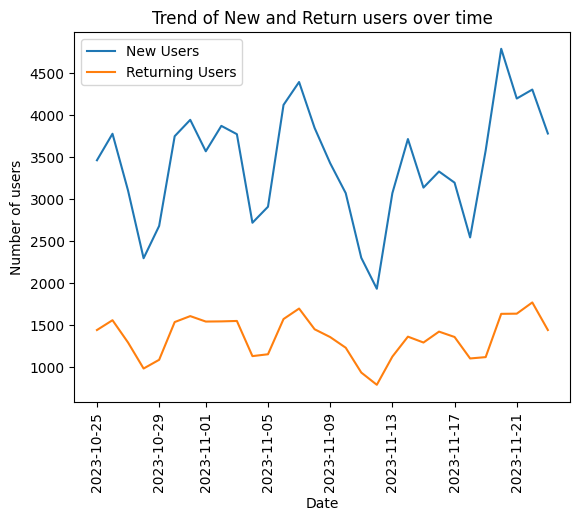

In [10]:
# another method trend analysis for new and Returning users
x= data['Date']
y1 = data['New users']
y2 = data['Returning users']

# plotting the data
plt.plot(x,y1,label = 'New Users')
plt.plot(x,y2,label = 'Returning Users')

plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Number of users')
plt.title('Trend of New and Return users over time')


#plt.plot(y1,'o:g', linestyle='--',linewidth='8')
#plt.plot(y2, 'o:g',linestyle =':',linewidth='8')


plt.legend()



In [11]:
fig = px.line(data_frame=data,x='Date',y=['Duration Day 1','Duration Day 7'],markers=True,labels={'value':'Duration'})
fig.update_layout(title='Trend of duration (Day1 and Day 7) over time',xaxis_title='Date',yaxis_title='Duration')
fig.show()

<ipython-input-12-0721ef309bc4>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



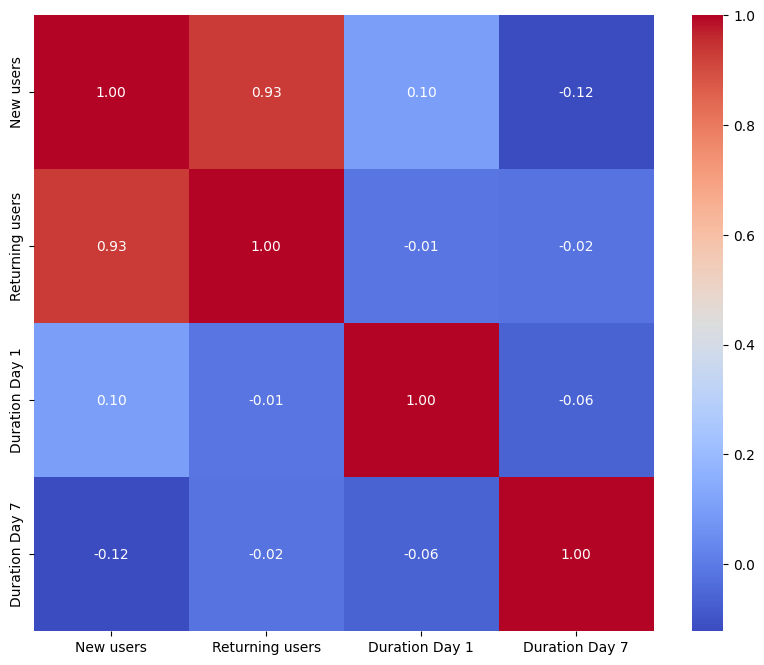

In [12]:
# now let's have a look at the correlation between the variables:
correlation_matrix = data.corr()

# plotting the colleration matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

Here, The strongest coleration is between the New and Returning users.

**For the task of Cohort Analysis, we’ll group the data by the week of the year to create cohorts. Then, for each cohort (week), we’ll calculate the average number of new and returning users, as well as the average of Duration Day 1 and Duration Day 7. Let’s start by grouping the data by week and calculating the necessary averages:**

In [13]:
data['Week'] = data['Date'].dt.isocalendar().week

In [14]:
# calculating weekly average:
weekly_average = data.groupby('Week').agg({
    'New users':'mean',
    'Returning users':'mean',
    'Duration Day 1':'mean',
    'Duration Day 7':'mean'
}).reset_index()

In [15]:
weekly_average.head()

,Week,New users,Returning users,Duration Day 1,Duration Day 7
0,43,3061.800000,1267.800000,220.324375,225.185602
1,44,3503.571429,1433.142857,189.088881,168.723200
2,45,3297.571429,1285.714286,198.426524,143.246721
3,46,3222.428571,1250.000000,248.123542,110.199609
4,47,4267.750000,1616.250000,174.173330,0.000000


In [16]:
# Now, let’s have a look at the weekly average of the new and returning users and the duration:

In [19]:
fig1 = px.line(weekly_average,x='Week',y=['New users','Returning users'],markers=True,\
               labels = {'value':'Average week number of users'},title='weekly average of new vs returning users')
fig1.update_xaxes(title = 'week of the year')
fig1.update_yaxes(title='Average number of user')

fig2 = px.line(weekly_average,x='Week',y=['Duration Day 1','Duration Day 7'],markers=True,\
               labels = {'value':'Average week number of users'},title='weekly average of Duration Day 1 and 7')
fig2.update_xaxes(title = 'week of the year')
fig2.update_yaxes(title='Average Duration')

fig1.show()
fig2.show()


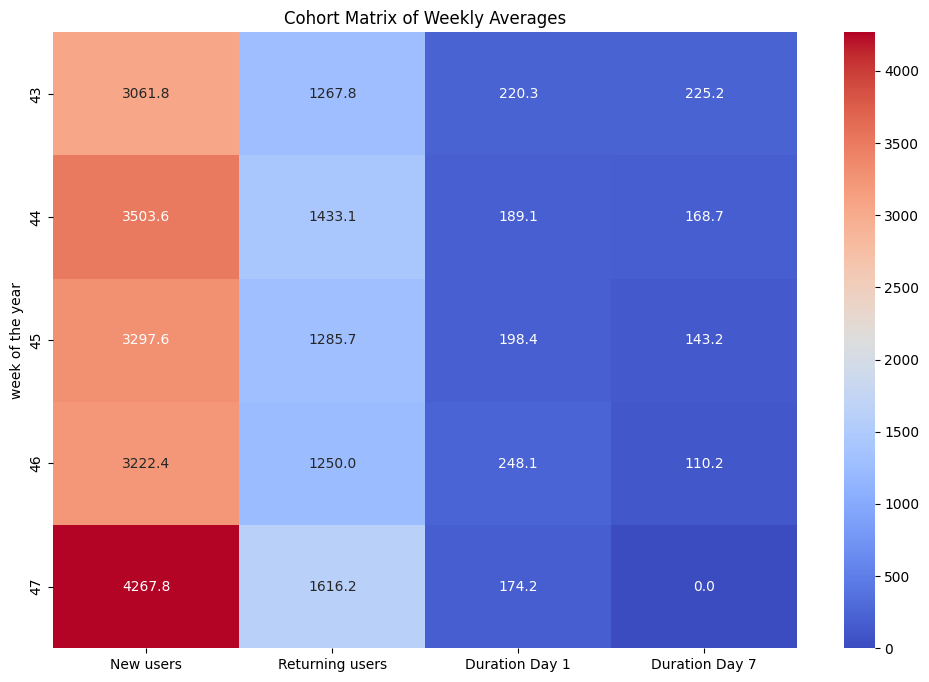

In [22]:
# Creating a cohort matrix
cohort_matrix = weekly_average.set_index('Week')

# Plotting the cohort matrix
plt.figure(figsize=(12, 8))

sns.heatmap(cohort_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Cohort Matrix of Weekly Averages')
plt.ylabel('week of the year')
plt.show()

**summary**
Cohort Analysis is a data analysis technique used to gain insights into the behaviour and characteristics of specific groups of users or customers over time. It is valuable for businesses as it allows them to understand user behaviour in a more granular and actionable way. I hope you liked this article on Cohort Analysis using Python.